# Load libraries

In [198]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import re


# Specify git executable file for GitPython in Jupyter Notebook (In IDE, it can still work without this line.)
os.environ["GIT_PYTHON_GIT_EXECUTABLE"] = "C:\Program Files\Git\cmd\git.exe"

import git
from git import RemoteProgress

from git import Repo
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clone repo from GitHub

Link: https://git-scm.com/docs/git-clone <br>
<b>Note:</b> In case too-long file path issue occurs in Windows, set <code>git config --system core.longpaths true</code>

In [199]:
class Progress(RemoteProgress):
    def update(self, op_code, cur_count, max_count=None, message=''):
        print(self._cur_line)

In [254]:
#remote_link = "https://github.com/phpmyadmin/phpmyadmin"
local_link = "tomcat55"
# Uncomment to clone
# Repo.clone_from(remote_link, local_link, progress=Progress())

In [255]:
repo = Repo(local_link)
fixing_commit = "863d77c7d321245de019ac32252828e0a025c5b4"
affected_file = "container/webapps/manager/WEB-INF/classes/org/apache/catalina/manager/HTMLManagerServlet.java"

# A) Show info of a commit
Link: https://git-scm.com/docs/git-show
You can explore different parameters.

In [256]:
show_data = repo.git.show("-s", fixing_commit).splitlines()
for line in show_data:
    print(line)

commit 863d77c7d321245de019ac32252828e0a025c5b4
Author: Konstantin Kolinko <kkolinko@apache.org>
Date:   Tue Jan 11 08:13:05 2011 +0000

    Improve filtering
    
    git-svn-id: https://svn.apache.org/repos/asf/tomcat/tc5.5.x/trunk@1057518 13f79535-47bb-0310-9956-ffa450edef68


# B) Show total files affected in the fixing commit

In [257]:
show_total_files_affected = repo.git.show ("--stat", fixing_commit).splitlines()
for line in show_total_files_affected:
    print(line)

commit 863d77c7d321245de019ac32252828e0a025c5b4
Author: Konstantin Kolinko <kkolinko@apache.org>
Date:   Tue Jan 11 08:13:05 2011 +0000

    Improve filtering
    
    git-svn-id: https://svn.apache.org/repos/asf/tomcat/tc5.5.x/trunk@1057518 13f79535-47bb-0310-9956-ffa450edef68

 container/webapps/docs/changelog.xml               |  3 +++
 .../catalina/manager/HTMLManagerServlet.java       | 27 +++++++++++-----------
 .../apache/catalina/manager/StatusTransformer.java |  8 +++----
 3 files changed, 21 insertions(+), 17 deletions(-)


## C) Show total directories affected in the fixing commit

In [258]:
show_total_directories_affected = repo.git.show ("--dirstat", fixing_commit).splitlines()
for line in show_total_directories_affected:
    print(line)

commit 863d77c7d321245de019ac32252828e0a025c5b4
Author: Konstantin Kolinko <kkolinko@apache.org>
Date:   Tue Jan 11 08:13:05 2011 +0000

    Improve filtering
    
    git-svn-id: https://svn.apache.org/repos/asf/tomcat/tc5.5.x/trunk@1057518 13f79535-47bb-0310-9956-ffa450edef68

   4.6% container/webapps/docs/
  95.3% container/webapps/manager/WEB-INF/classes/org/apache/catalina/manager/


# D) Show total lines of code deleted including comments and blank lines

In [260]:
show_total_lines_deleted = repo.git.show ("--shortstat", fixing_commit).splitlines()
show_total_lines_deleted.reverse()
show_total_lines_deleted = show_total_lines_deleted[0].split(',') 
print(show_total_lines_deleted[2])

 17 deletions(-)


# E) Show total lines of code added including comments and blank lines

In [261]:
show_total_lines_added = repo.git.show ("--shortstat", fixing_commit).splitlines()
show_total_lines_added.reverse()
show_total_lines_added = show_total_lines_added[0].split(',') 
print(show_total_lines_added[1])

 21 insertions(+)


# F) Show total lines of code deleted excluding comments and blank lines

In [262]:
show_total_lines_deleted = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
temp_line_deleted = []
t_l_deleted = 0
for line in show_total_lines_deleted:
    if re.search("^\-",line):
        l = line.split(" ")
        if(len(l) > 1):
            if(len(l[0])==1):
                if(l[1][:1] != '*' or l[1][:1] !='/'):
                    print(line)
                    t_l_add += 1
print("Total lines of code deleted excluding comments and blank lines = "+ str(t_l_deleted))
            

-                args[0] = displayPath;
-                args[1] = context.getDisplayName();
-                if (args[1] == null) {
-                args[3] = response.encodeURL
-                     "/html/sessions?path=" + displayPath);
-                args[0] = response.encodeURL
-                     "/html/start?path=" + displayPath);
-                args[2] = response.encodeURL
-                     "/html/stop?path=" + displayPath);
-                args[4] = response.encodeURL
-                     "/html/reload?path=" + displayPath);
-                args[6] = response.encodeURL
-                     "/html/undeploy?path=" + displayPath);
-                writer.print(webModuleName);
-            writer.print(name);
-            writer.print(servletName);
-                    writer.print(mappings[i]);
Total lines of code deleted excluding comments and blank lines = 0


# G) Show total lines of code added excluding comments and blank lines

In [263]:
show_total_lines_add = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
temp_line_add = []
t_l_add = 0
for line in show_total_lines_add:
    if re.search("^\+",line):
        l = line.split(" ")
        if(len(l) > 1):
            if(len(l[0])==1):
                if(l[1][:1] != '*' or l[1][:1] !='/'):
                    print(line)
                    t_l_add += 1
print("Total lines of code added excluding comments and blank lines = "+ str(t_l_add))
            

+      <fix>
+        Improve filtering of Manager display output. (kkolinko) 
+      </fix>
+                args[0] = RequestUtil.filter(displayPath);
+                if (context.getDisplayName() == null) {
+                } else {
+                    args[1] = RequestUtil.filter(context.getDisplayName());
+                args[3] = RequestUtil.filter(response.encodeURL
+                     "/html/sessions?path=" + displayPath));
+                args[0] = RequestUtil.filter(response.encodeURL
+                     "/html/start?path=" + displayPath));
+                args[2] = RequestUtil.filter(response.encodeURL
+                     "/html/stop?path=" + displayPath));
+                args[4] = RequestUtil.filter(response.encodeURL
+                     "/html/reload?path=" + displayPath));
+                args[6] = RequestUtil.filter(response.encodeURL
+                     "/html/undeploy?path=" + displayPath));
+                writer.print(filter(webModuleName));
+      

# H) Days between current fixing commit and previous commit of each affected file

In [264]:
date_diff = repo.git.log ("--format=%cd",fixing_commit,"--",affected_file,"-2").splitlines()
currentdate = datetime.strptime(date_diff[0],"%a %b %d %X %Y %z")
previousdate= datetime.strptime(date_diff[1],"%a %b %d %X %Y %z")
datediff = (abs(currentdate-previousdate).days)
print("Days between current fixing commit and previous commit of each affected file:"+str(datediff))

Days between current fixing commit and previous commit of each affected file:229


# I)  no.of.times each affected file of the current fixing commit been modified in the past time since their creation

In [265]:
no_of_times = repo.git.log ("--format=%cd", fixing_commit,"--",affected_file,"--follow").splitlines()
print(len(no_of_times))

4


# J) Developers have modified each affected file since its creation

In [266]:
no_of_developers = repo.git.log ("--follow","--format=%an",fixing_commit,"--",affected_file).splitlines()
developers= set(no_of_developers)
num=1
for line in developers:
        print(num,line)
        num=num+1
        

1 Mark Emlyn David Thomas
2 Rainer Jung
3 Konstantin Kolinko


# K) For each developer identified, no.of.commits have each of them submitted

In [267]:
commit_developers = repo.git.shortlog("-s","-n","--no-merges",fixing_commit,"--",affected_file).splitlines()
developer_commits = []
for line in commit_developers:
    commit, developer = line.split("\t")
    developer_commits.append([int(commit),developer])

In [269]:
df = pd.DataFrame(developer_commits, columns=['commit','Developer'])

In [270]:
df.head()

,commit,Developer
0,2,Konstantin Kolinko
1,1,Mark Emlyn David Thomas
2,1,Rainer Jung


# Show all developers across all branches
Link: https://git-scm.com/docs/git-shortlog

In [271]:
commit_authors = repo.git.shortlog("-sne", "--all").splitlines()

author_commits = []

for commit_author in commit_authors:
    commit, author = commit_author.split("\t")
    author_commits.append([int(commit), author])

In [272]:
df = pd.DataFrame(author_commits, columns=['Commit', 'Author'])

In [273]:
df.head()

,Commit,Author
0,414,Mark Emlyn David Thomas <markt@apache.org>
1,306,Konstantin Kolinko <kkolinko@apache.org>
2,85,Rainer Jung <rjung@apache.org>
3,68,Jim Jagielski <jim@apache.org>
4,25,Keiichi Fujino <kfujino@apache.org>


## Top 10 most active developers in the project

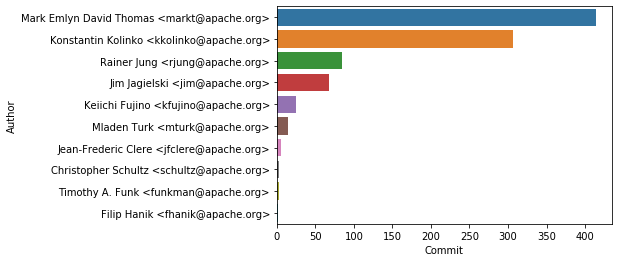

In [274]:
sns.barplot(y='Author', x="Commit", data=df[:10])

# Code changes between 2 commits
<b>Note:</b> Watch out for the initial commit (no parent commit)

In [275]:
diff_data = repo.git.diff(fixing_commit + "^", fixing_commit).splitlines()
for line in diff_data:
    print(line)

diff --git a/container/webapps/docs/changelog.xml b/container/webapps/docs/changelog.xml
index 1568f757..bd4ee70c 100644
--- a/container/webapps/docs/changelog.xml
+++ b/container/webapps/docs/changelog.xml
@@ -106,6 +106,9 @@
       <update>
         Improve documentation of database connection factory. (rjung)
       </update>
+      <fix>
+        Improve filtering of Manager display output. (kkolinko) 
+      </fix>
     </changelog>
   </subsection>
 </section>
diff --git a/container/webapps/manager/WEB-INF/classes/org/apache/catalina/manager/HTMLManagerServlet.java b/container/webapps/manager/WEB-INF/classes/org/apache/catalina/manager/HTMLManagerServlet.java
index f7391ebe..31039b29 100644
--- a/container/webapps/manager/WEB-INF/classes/org/apache/catalina/manager/HTMLManagerServlet.java
+++ b/container/webapps/manager/WEB-INF/classes/org/apache/catalina/manager/HTMLManagerServlet.java
@@ -370,15 +370,16 @@ public final class HTMLManagerServlet extends ManagerServlet {
         

# Identify the last commit that changes a line modified in the current commit

Link: https://git-scm.com/docs/git-blame

In [276]:
blame_data = repo.git.blame("-L113,+1", fixing_commit + "^", "--", affected_file).splitlines()
for line in blame_data:
    print(line)

2ee172f41 (Mark Emlyn David Thomas 2009-08-07 19:49:24 +0000 113)         list(request, response, message);


# Show all the commit history between two commits

Link: https://git-scm.com/docs/git-log <br> Watch out for initial commit (no parent commit)

In [277]:
last_commit = blame_data[0].strip().split()[0]
log_data = repo.git.log("--oneline", last_commit + ".." + fixing_commit + "^").splitlines()
print("Number of commits in between:", len(log_data))

Number of commits in between: 523


In [278]:
log_data

['582e2765 Fix https://issues.apache.org/bugzilla/show_bug.cgi?id=50413 Ensure 304s are not returned when using static files as error pages',
 '2c30a819 propose additional patch for bug 50413',
 'c4ada2fa vote and proposal',
 '4e094858 Upgrade Commons Daemon to version 1.0.5 Fixes various Windows platform issues.',
 '32c98ffa vote',
 '778ca208 Change vote.',
 'dfe79169 Vote, Comment.',
 'e0bc3c4a add a note and vote',
 '4fa8747d Propose backport of 47319 fix to TC 5.5',
 "5fbf2eb0 Withdraw proposals. Manager & HostManager using httpOnly=true is fine with me (r1041251). Let's not force this option by default.",
 'aef68b74 Propose Commons Daemon update to 1.0.5',
 '41f7c1aa Proposal',
 '2d3155b9 Proposal',
 '01836948 Updated tc5 specific patch',
 '3f31dbd7 Improve documentation of database connection factory. Backport of r1053727 from trunk resp. r1054646 from TC6.',
 '74214bb3 Update copyright year.',
 '8f48a5ad change vote',
 'bc88efd1 vote and proposal',
 '665452ba Proposals',
 'f3bca